# [3D] Hindmarsh Rose Model

In [1]:
import brainpy as bp

# bp.math.set_platform('cpu')
bp.math.enable_x64()

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
class HindmarshRose(bp.DynamicalSystem):
  def __init__(self, method='exp_auto'):
    super(HindmarshRose, self).__init__()

    # parameters
    self.a = 1.
    self.b = 2.5
    self.c = 1.
    self.d = 5.
    self.s = 4.
    self.x_r = -1.6
    self.r = 0.001

    # variables
    self.x = bp.math.Variable(bp.math.ones(1))
    self.y = bp.math.Variable(bp.math.ones(1))
    self.z = bp.math.Variable(bp.math.ones(1))
    self.I = bp.math.Variable(bp.math.zeros(1))

    # integral functions
    def dx(x, t, y, z, Isyn):
      return y - self.a * x ** 3 + self.b * x * x - z + Isyn

    def dy(y, t, x):
      return self.c - self.d * x * x - y

    def dz(z, t, x):
      return self.r * (self.s * (x - self.x_r) - z)

    self.int_x = bp.odeint(f=dx, method=method)
    self.int_y = bp.odeint(f=dy, method=method)
    self.int_z = bp.odeint(f=dz, method=method)

  def update(self, tdi):
    self.x.value = self.int_x(self.x, tdi.t, self.y, self.z, self.I, tdi.dt)
    self.y.value = self.int_y(self.y, tdi.t, self.x, tdi.dt)
    self.z.value = self.int_z(self.z, tdi.t, self.x, tdi.dt)
    self.I[:] = 0.

## Simulation

  0%|          | 0/20000 [00:00<?, ?it/s]

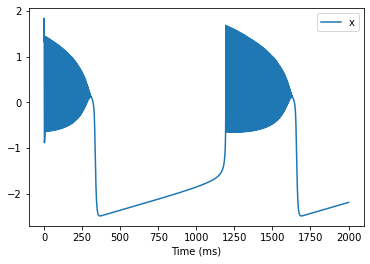

In [4]:
model = HindmarshRose()

runner = bp.DSRunner(model, monitors=['x', 'y', 'z'], inputs=['I', 1.5])
runner.run(2000.)
bp.visualize.line_plot(runner.mon.ts, runner.mon.x, legend='x', show=True)

## Bifurcation analysis

I am making bifurcation analysis ...
I am filtering out fixed point candidates with auxiliary function ...
I am trying to find fixed points by optimization ...
	There are 7000 candidates
I am trying to filter out duplicate fixed points ...
	Found 789 fixed points.
I am plotting the trajectory ...


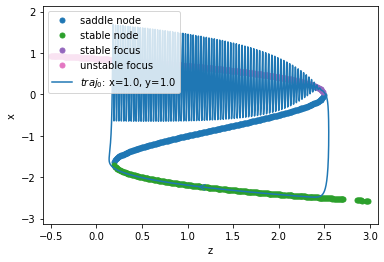

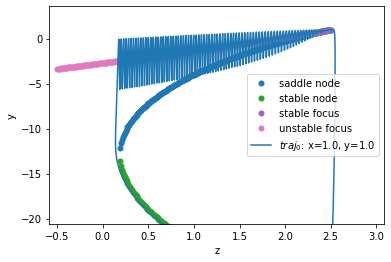

In [5]:
analyzer = bp.analysis.FastSlow2D(
    [model.int_x, model.int_y, model.int_z],
    fast_vars={'x': [-3, 2], 'y': [-20., 3.]},
    slow_vars={'z': [-0.5, 3.]},
    pars_update={'Isyn': 1.5},
    resolutions={'z': 0.01},
    # options={bp.analysis.C.y_by_x_in_fy: lambda x: model.c - model.d * x * x}
)
analyzer.plot_bifurcation(num_rank=20)
analyzer.plot_trajectory({'x': [1.], 'y': [1.], 'z': [1.]},
                       duration=1700,
                       plot_durations=[360, 1680])
analyzer.show_figure()

## Phase plane analysis

I am computing fx-nullcline ...
I am evaluating fx-nullcline by optimization ...
I am computing fy-nullcline ...
I am evaluating fy-nullcline by optimization ...
I am creating the vector field ...
I am searching fixed points ...
I am trying to find fixed points by optimization ...
	There are 2111 candidates
I am trying to filter out duplicate fixed points ...
	Found 1 fixed points.
	#1 x=0.862288349294799, y=-2.7177058646654935 is a unstable focus.
I am plotting the trajectory ...


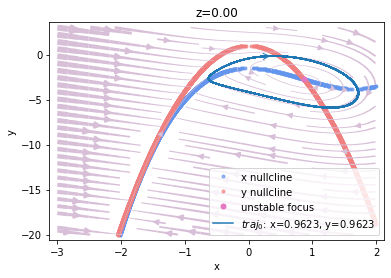

I am computing fx-nullcline ...
I am evaluating fx-nullcline by optimization ...
I am computing fy-nullcline ...
I am evaluating fy-nullcline by optimization ...
I am creating the vector field ...
I am searching fixed points ...
I am trying to find fixed points by optimization ...
	There are 2141 candidates
I am trying to filter out duplicate fixed points ...
	Found 3 fixed points.
	#1 x=-1.872654283356628, y=-16.5341715842593 is a stable node.
	#2 x=-1.4420391946597404, y=-9.397382585390593 is a saddle node.
	#3 x=0.8146858103927409, y=-2.318565022506274 is a unstable focus.
I am plotting the trajectory ...


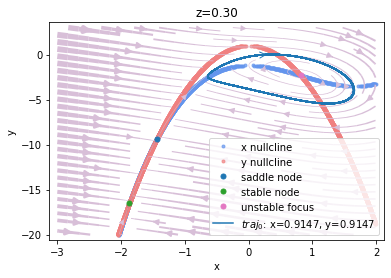

I am computing fx-nullcline ...
I am evaluating fx-nullcline by optimization ...
I am computing fy-nullcline ...
I am evaluating fy-nullcline by optimization ...
I am creating the vector field ...
I am searching fixed points ...
I am trying to find fixed points by optimization ...
	There are 2171 candidates
I am trying to filter out duplicate fixed points ...
	Found 3 fixed points.
	#1 x=-2.0462132406600912, y=-19.934943131130087 is a stable node.
	#2 x=-1.2168555131297534, y=-6.40368673337723 is a saddle node.
	#3 x=0.7630687306850773, y=-1.911369548008847 is a unstable focus.
I am plotting the trajectory ...


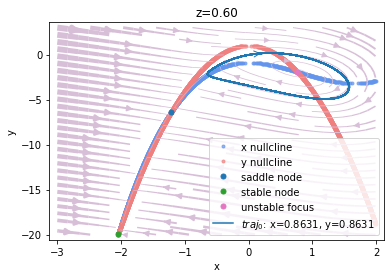

I am computing fx-nullcline ...
I am evaluating fx-nullcline by optimization ...
I am computing fy-nullcline ...
I am evaluating fy-nullcline by optimization ...
I am creating the vector field ...
I am searching fixed points ...
I am trying to find fixed points by optimization ...
	There are 2201 candidates
I am trying to filter out duplicate fixed points ...
	Found 3 fixed points.
	#1 x=-2.1556926349477843, y=-22.235053679257277 is a stable node.
	#2 x=-1.05070800710585, y=-4.519936589150076 is a saddle node.
	#3 x=0.7064006730222961, y=-1.4950094398974472 is a unstable focus.
I am plotting the trajectory ...


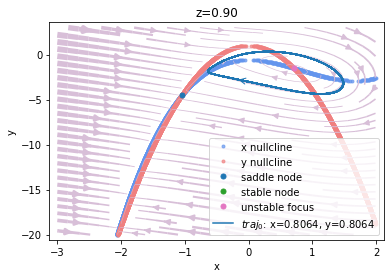

I am computing fx-nullcline ...
I am evaluating fx-nullcline by optimization ...
I am computing fy-nullcline ...
I am evaluating fy-nullcline by optimization ...
I am creating the vector field ...
I am searching fixed points ...
I am trying to find fixed points by optimization ...
	There are 2231 candidates
I am trying to filter out duplicate fixed points ...
	Found 3 fixed points.
	#1 x=-2.2411861683124883, y=-24.1145772063309 is a stable node.
	#2 x=-0.901932179236277, y=-3.067408474244581 is a saddle node.
	#3 x=0.6431188901157783, y=-1.0680095250383574 is a unstable focus.
I am plotting the trajectory ...


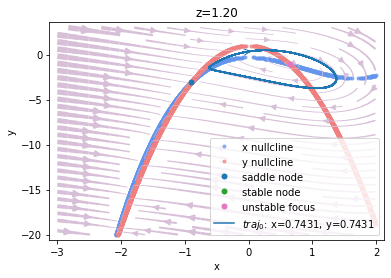

I am computing fx-nullcline ...
I am evaluating fx-nullcline by optimization ...
I am computing fy-nullcline ...
I am evaluating fy-nullcline by optimization ...
I am creating the vector field ...
I am searching fixed points ...
I am trying to find fixed points by optimization ...
	There are 2261 candidates
I am trying to filter out duplicate fixed points ...
	Found 3 fixed points.
	#1 x=-2.3130990884027134, y=-25.75213708580098 is a stable node.
	#2 x=-0.7575691876779478, y=-1.8695551041910168 is a saddle node.
	#3 x=0.5706681801629564, y=-0.6283107114652488 is a unstable focus.
I am plotting the trajectory ...


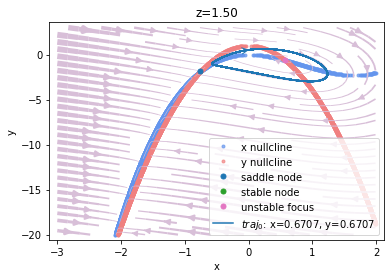

I am computing fx-nullcline ...
I am evaluating fx-nullcline by optimization ...
I am computing fy-nullcline ...
I am evaluating fy-nullcline by optimization ...
I am creating the vector field ...
I am searching fixed points ...
I am trying to find fixed points by optimization ...
	There are 2291 candidates
I am trying to filter out duplicate fixed points ...
	Found 3 fixed points.
	#1 x=-2.3760052650455847, y=-27.227005096799942 is a stable node.
	#2 x=-0.6083084538224832, y=-0.8501958918559419 is a saddle node.
	#3 x=0.48431473687387644, y=-0.17280300724589612 is a unstable focus.
I am plotting the trajectory ...


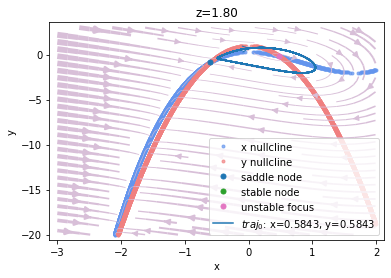

I am computing fx-nullcline ...
I am evaluating fx-nullcline by optimization ...
I am computing fy-nullcline ...
I am evaluating fy-nullcline by optimization ...
I am creating the vector field ...
I am searching fixed points ...
I am trying to find fixed points by optimization ...
	There are 2321 candidates
I am trying to filter out duplicate fixed points ...
	Found 3 fixed points.
	#1 x=-2.4323928622096647, y=-28.582675180900974 is a stable node.
	#2 x=-0.4407309093835196, y=0.028781414591295275 is a saddle node.
	#3 x=0.37312367222430437, y=0.30389369711344255 is a unstable focus.
I am plotting the trajectory ...


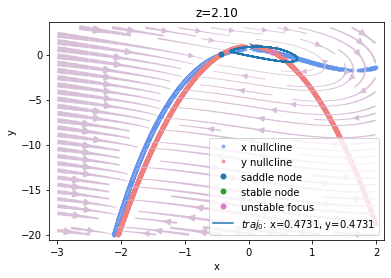

I am computing fx-nullcline ...
I am evaluating fx-nullcline by optimization ...
I am computing fy-nullcline ...
I am evaluating fy-nullcline by optimization ...
I am creating the vector field ...
I am searching fixed points ...
I am trying to find fixed points by optimization ...
	There are 2351 candidates
I am trying to filter out duplicate fixed points ...
	Found 3 fixed points.
	#1 x=-2.4837904744530963, y=-29.84607557713767 is a stable node.
	#2 x=-0.20892015454771234, y=0.7817619225980599 is a saddle node.
	#3 x=0.19271039914787816, y=0.8143135053948518 is a stable focus.
I am plotting the trajectory ...


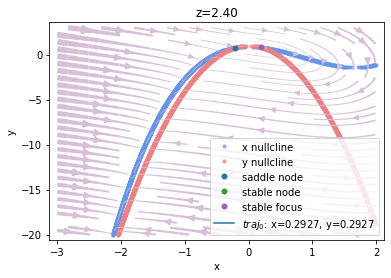

In [6]:
for z in np.arange(0., 2.5, 0.3):
    analyzer = bp.analysis.PhasePlane2D(
      [model.int_x, model.int_y],
      target_vars={'x': [-3, 2], 'y': [-20., 3.]},
      pars_update={'Isyn': 1.5, 'z': z},
      resolutions={'x': 0.01, 'y': 0.01},
    )
    analyzer.plot_nullcline()
    analyzer.plot_vector_field()
    fps = analyzer.plot_fixed_point(with_return=True)
    analyzer.plot_trajectory({'x': [fps[-1, 0] + 0.1], 'y': [fps[-1, 0] + 0.1]},
                             duration=500, plot_durations=[400, 500])
    plt.title(f'z={z:.2f}')
    plt.show()